In [1]:
import pandas as pd
import finnhub as fin
import json
import time
import numpy as np

In [3]:
#insert API key
fin_client = fin.Client(api_key="Your_API_key_here")

In [4]:
#read in the previously created csv
df = pd.read_csv('sustainalytics_scores_final.csv')
df

,name,ticker,exchange,Sustainalytics_score
0,Alcoa Corp,AA,NYSE,22.2
1,"American Airlines Group, Inc.",AAL,NASDAQ,24.5
2,"Aaron's Company, Inc.",AAN,NYSE,29.1
3,"AAON, Inc.",AAON,NASDAQ,19.1
4,Advance Auto Parts Inc,AAP,NYSE,26.4
...,...,...,...,...
2476,"Zscaler, Inc.",ZS,NASDAQ,34.9
2477,Zoetis Inc.,ZTS,NYSE,21.3
2478,Zumiez Inc.,ZUMZ,NASDAQ,18.5
2479,"Zuora, Inc.",ZUO,NYSE,16.1


In [5]:
#create a list out of the company tickers
ticker_list = df['ticker'].tolist()
ticker_list

['AA',
 'AAL',
 'AAN',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABG',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABUS',
 'AC',
 'ACA',
 'ACAD',
 'ACCO',
 'ACGL',
 'ACHC',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACRE',
 'ACRS',
 'ACTG',
 'ADBE',
 'ADC',
 'ADI',
 'ADM',
 'ADNT',
 'ADP',
 'ADPT',
 'ADSK',
 'ADT',
 'ADUS',
 'ADVM',
 'AEE',
 'AEIS',
 'AEL',
 'AEO',
 'AER',
 'AERI',
 'AES',
 'AFG',
 'AFL',
 'AFMD',
 'AFYA',
 'AGCO',
 'AGEN',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRO',
 'AGS',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AI',
 'AIG',
 'AIMC',
 'AIN',
 'AIR',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKRO',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALDX',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG',
 'ALGN',
 'ALGT',
 'ALK',
 'ALKS',
 'ALL',
 'ALLE',
 'ALLK',
 'ALLO',
 'ALLY',
 'ALNY',
 'ALPN',
 'ALRM',
 'ALRS',
 'ALSN',
 'ALT',
 'ALTR',
 'ALV',
 'ALX',
 'AMAL',
 'AMAT',
 'AMBA',
 'AMC',
 'AMCR',
 'AMCX',
 'AMD',
 'AME',
 'AMED

In [6]:
#create new dataframe to hold the percentage of women
df_women = pd.DataFrame(index=['Share of Women'])
df_women

""
Share of Women


In [7]:
#loop through the list of tickers and get the gender of each company's executives; 
#then calculate the share of female executives and add it to the df

counter = 0
for i in ticker_list:
    counter += 1
    executives = fin_client.company_executive(i)
    execs_sex = [item['sex'] for item in executives['executive']]
    female = execs_sex.count('female')
    male = execs_sex.count('male')
    try:
        share_of_fems = round((female / (male + female))*100,2)
    except ZeroDivisionError:
        share_of_fems = 0
    
    df_women[i] = share_of_fems
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_women

,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,ABBV,ABC,...,ZEN,ZEUS,ZION,ZM,ZOM,ZS,ZTS,ZUMZ,ZUO,ZYXI
Share of Women,36.84,28.0,33.33,20.0,27.78,38.46,25.0,18.75,31.82,41.18,...,31.58,25.0,23.33,27.78,25.0,16.67,40.91,21.43,28.57,16.67


In [8]:
#create a new Dataframe to hold the company revenue
df_revs = pd.DataFrame(index=['Avg revenue'])
df_revs

""
Avg revenue


In [9]:
#loop through the tickers and get the annual revenue for each company;
#then calculate the average revenue over the last four years (2021 through 2018)

counter = 0
revs = []

for i in ticker_list: 
    counter += 1 
    finance = fin_client.financials(i, 'ic', 'annual')
    try:
        revs = [item['revenue'] for item in finance['financials']]
    except (KeyError, TypeError):
        continue
        
    four_revs = revs[:4]
    avg = round(sum(four_revs)/4)
    df_revs[i] = avg
    
    revs = []
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_revs

,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,ABBV,ABC,...,ZBRA,ZEN,ZEUS,ZM,ZOM,ZS,ZTS,ZUMZ,ZUO,ZYXI
Avg revenue,11318,34382,1793,488,10098,291525,355,3165,42005,187853,...,4694,946,1710,1926,1,625,6634,1047,291,72


In [10]:
#create a new dataframe to hold the employee number for each company
df_employees = pd.DataFrame(index=['Employees'])
df_employees

""
Employees


In [11]:
#loop through the tickers and get the employee number for each company

counter = 0
for i in ticker_list:  
    counter += 1 
    profile = fin_client.company_profile(symbol=i)
    try:
        emps = profile['employeeTotal']
    except (KeyError, TypeError):
        continue
        
    df_employees[i] = emps
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_employees

,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,ABBV,ABC,...,ZEN,ZEUS,ZION,ZM,ZOM,ZS,ZTS,ZUMZ,ZUO,ZYXI
Employees,12200,123400,9170,2881,41000,154000,206,4056,50000,38000,...,6540,1644,9685,8044,47,4975,12100,2500,1393,774


In [12]:
#create a new dataframe to hold the industry group for each company
df_group = pd.DataFrame(index=['Group'])
df_group

""
Group


In [13]:
#loop through the tickers and get the industry group for each company

counter = 0
for i in ticker_list: 
    counter += 1 
    profile = fin_client.company_profile(symbol=i)
    try:
        group = profile['ggroup']
    except (KeyError, TypeError):
        continue
    
    df_group[i] = group
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_group

,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,ABBV,ABC,...,ZEN,ZEUS,ZION,ZM,ZOM,ZS,ZTS,ZUMZ,ZUO,ZYXI
Group,Materials,Transportation,Retailing,Capital Goods,Retailing,Technology Hardware & Equipment,Real Estate,Transportation,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care Equipment & Services,...,Software & Services,Materials,Banks,Software & Services,Health Care Equipment & Services,Software & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Retailing,Software & Services,Health Care Equipment & Services


In [14]:
#create a new dataframe to hold the industry sector for each company
df_sector = pd.DataFrame(index=['Sector'])
df_sector

""
Sector


In [15]:
#loop through the tickers and get the industry sector for each company

counter = 0
for i in ticker_list:
    counter += 1 
    profile = fin_client.company_profile(symbol=i)
    try:
        sector = profile['gsector']
    except (KeyError, TypeError):
        continue
        print(f"No industry sector for {i} available")
    
    df_sector[i] = sector
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_sector

,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,ABBV,ABC,...,ZEN,ZEUS,ZION,ZM,ZOM,ZS,ZTS,ZUMZ,ZUO,ZYXI
Sector,Materials,Industrials,Consumer Discretionary,Industrials,Consumer Discretionary,Information Technology,Real Estate,Industrials,Health Care,Health Care,...,Information Technology,Materials,Financials,Information Technology,Health Care,Information Technology,Health Care,Consumer Discretionary,Information Technology,Health Care


In [16]:
# join all the dataframes together for each company/ticker
df_list = [df_women, df_revs, df_employees, df_group, df_sector]
df_finn = pd.concat(df_list, axis=0) 
df_finn

,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,ABBV,ABC,...,ZEN,ZEUS,ZION,ZM,ZOM,ZS,ZTS,ZUMZ,ZUO,ZYXI
Share of Women,36.84,28.0,33.33,20.0,27.78,38.46,25.0,18.75,31.82,41.18,...,31.58,25.0,23.33,27.78,25.0,16.67,40.91,21.43,28.57,16.67
Avg revenue,11318,34382,1793,488,10098,291525,355,3165,42005,187853,...,946,1710,NaN,1926,1,625,6634,1047,291,72
Employees,12200,123400,9170,2881,41000,154000,206,4056,50000,38000,...,6540,1644,9685,8044,47,4975,12100,2500,1393,774
Group,Materials,Transportation,Retailing,Capital Goods,Retailing,Technology Hardware & Equipment,Real Estate,Transportation,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care Equipment & Services,...,Software & Services,Materials,Banks,Software & Services,Health Care Equipment & Services,Software & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Retailing,Software & Services,Health Care Equipment & Services
Sector,Materials,Industrials,Consumer Discretionary,Industrials,Consumer Discretionary,Information Technology,Real Estate,Industrials,Health Care,Health Care,...,Information Technology,Materials,Financials,Information Technology,Health Care,Information Technology,Health Care,Consumer Discretionary,Information Technology,Health Care


In [17]:
df_finnhub = df_finn.transpose()
df_finnhub.index.rename('ticker', inplace=True)
df_finnhub

,Share of Women,Avg revenue,Employees,Group,Sector
ticker,,,,,
AA,36.84,11318,12200,Materials,Materials
AAL,28.0,34382,123400,Transportation,Industrials
AAN,33.33,1793,9170,Retailing,Consumer Discretionary
AAON,20.0,488,2881,Capital Goods,Industrials
AAP,27.78,10098,41000,Retailing,Consumer Discretionary
...,...,...,...,...,...
ZS,16.67,625,4975,Software & Services,Information Technology
ZTS,40.91,6634,12100,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care
ZUMZ,21.43,1047,2500,Retailing,Consumer Discretionary


In [18]:
# read in the other spreadsheet with the ESG data and ticker symbols and merge the two dataframes
final_complete_df = pd.merge(df, 
                     df_finnhub, 
                     on ='ticker', 
                     how ='left')
final_complete_df

,name,ticker,exchange,Sustainalytics_score,Share of Women,Avg revenue,Employees,Group,Sector
0,Alcoa Corp,AA,NYSE,22.2,36.84,11318,12200,Materials,Materials
1,"American Airlines Group, Inc.",AAL,NASDAQ,24.5,28.0,34382,123400,Transportation,Industrials
2,"Aaron's Company, Inc.",AAN,NYSE,29.1,33.33,1793,9170,Retailing,Consumer Discretionary
3,"AAON, Inc.",AAON,NASDAQ,19.1,20.0,488,2881,Capital Goods,Industrials
4,Advance Auto Parts Inc,AAP,NYSE,26.4,27.78,10098,41000,Retailing,Consumer Discretionary
...,...,...,...,...,...,...,...,...,...
2476,"Zscaler, Inc.",ZS,NASDAQ,34.9,16.67,625,4975,Software & Services,Information Technology
2477,Zoetis Inc.,ZTS,NYSE,21.3,40.91,6634,12100,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care
2478,Zumiez Inc.,ZUMZ,NASDAQ,18.5,21.43,1047,2500,Retailing,Consumer Discretionary
2479,"Zuora, Inc.",ZUO,NYSE,16.1,28.57,291,1393,Software & Services,Information Technology


In [19]:
final_complete_df.to_csv("final_Systainalytics_score_finnhub_data.csv", index=False)

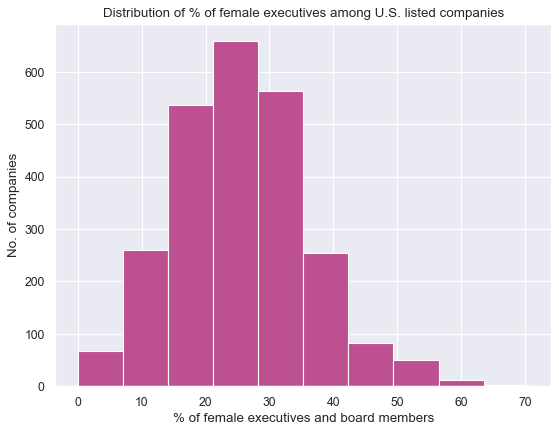

In [20]:
# use matplotlib to get a sense of the distribution of female executives and directors

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.hist(final_complete_df['Share of Women'], color='#bc5090')
plt.title("Distribution of % of female executives among U.S. listed companies")
plt.ylabel("No. of companies")
plt.xlabel("% of female executives and board members")
plt.savefig("women_share_distribution.png", dpi=100)
plt.show()